# Day 5 Analysis

For seasons 1999-2021, get a distribution of point differential
- Outliers
- Is there a difference between conferences? 
- Is there a difference between divisions within a conference?
- Is there a difference between regular season and playoffs?

## Set Up

In [3]:
import pandas as pd
from os import path
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Create database connection
conn = sqlite3.connect('../data/db/database.db')

## Wrangle the data

In [129]:
query = """
WITH data AS (
    SELECT
        game_id,
        season,
        game_type,
        week,
        away_team,
        away_score,
        -- Need to update data to account for 3 teams that switched cities between 1999-2020
        CASE
            WHEN home_team = 'STL' THEN 'LAR'
            WHEN home_team = 'SD' THEN 'LAC'
            WHEN home_team = 'OAK' THEN 'LV'
            ELSE home_team
        END AS home_team,
        home_score,
        roof,
        surface,
        temp,
        wind,
        away_rest,
        home_rest,
        weekday 
    FROM schedules
),
home_games AS (
    SELECT 
        d.season,
        d.week, 
        d.game_type, 
        d.home_team AS team,
        d.home_score AS score,
        team_desc.team_conf,
        team_desc.team_division
    FROM data d
    LEFT JOIN team_descriptions team_desc
        ON team_desc.team_abbr = d.home_team
),
away_games AS (
    SELECT 
        d.season,
        d.week, 
        d.game_type, 
        d.away_team AS team,
        d.away_score AS score,
        team_desc.team_conf,
        team_desc.team_division
    FROM data d 
    -- Get the division
    LEFT JOIN team_descriptions team_desc
        ON team_desc.team_abbr = d.home_team
),
stacked AS (
    SELECT *
    FROM home_games
    UNION
    SELECT *
    FROM away_games
)
SELECT *
FROM stacked
"""

df = pd.read_sql(query, conn)

In [139]:
df.head()

,season,week,game_type,team,score,team_conf,team_division
0,1999,1,REG,ARI,25.0,NFC,NFC East
1,1999,1,REG,ATL,14.0,NFC,NFC South
2,1999,1,REG,BAL,10.0,NFC,NFC West
3,1999,1,REG,BUF,14.0,AFC,AFC South
4,1999,1,REG,CAR,10.0,NFC,NFC South


## Plot

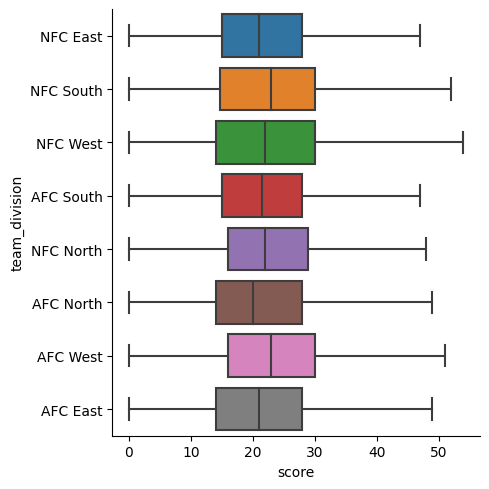

In [138]:
sns.catplot(
    x="score",
    y="team_division",
    data=df,
    kind="box",
    showfliers=False
)
plt.show()